# Análisis Exploratorio de Datos


## Importacion de librerias


In [1]:
import numpy as np
import pandas as pd

## Cargar datos


In [2]:
data = pd.read_csv("merged_songs.csv")
print(data.info())

print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80231 entries, 0 to 80230
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             80231 non-null  object 
 1   artist_name       80231 non-null  object 
 2   track_name        80231 non-null  object 
 3   track_id          80231 non-null  object 
 4   popularity        80231 non-null  int64  
 5   acousticness      80231 non-null  float64
 6   danceability      80231 non-null  float64
 7   duration_ms       80231 non-null  int64  
 8   energy            80231 non-null  float64
 9   instrumentalness  80231 non-null  float64
 10  key               80231 non-null  object 
 11  liveness          80231 non-null  float64
 12  loudness          80231 non-null  float64
 13  mode              80231 non-null  object 
 14  speechiness       80231 non-null  float64
 15  tempo             80231 non-null  float64
 16  time_signature    80231 non-null  object

- genre: Género musical de la canción.
- artist_name: Nombre del artista.
- track_name: Nombre de la canción.
- track_id: Identificador único de la canción.
- popularity: Popularidad de la canción (valor numérico).
- acousticness: Medida de cuán acústica es la canción.
- danceability: Facilidad para bailar la canción.
- duration_ms: Duración de la canción en milisegundos.
- energy: Nivel de energía de la canción.
- instrumentalness: Probabilidad de que la canción sea instrumental.
- key: Tono musical de la canción.
- liveness: Presencia de público en la grabación.
- loudness: Volumen general de la canción (en decibelios).
- mode: Modo musical (mayor o menor).
- speechiness: Presencia de palabras habladas en la canción.
- tempo: Tempo de la canción (en BPM).
- time_signature: Compás de la canción.
- valence: Medida de positividad o felicidad transmitida por la canción.


## Limpieza de datos


In [3]:
# Eliminar filas con valores nulos en el DataFrame
data = data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 80188 entries, 0 to 80230
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             80188 non-null  object 
 1   artist_name       80188 non-null  object 
 2   track_name        80188 non-null  object 
 3   track_id          80188 non-null  object 
 4   popularity        80188 non-null  int64  
 5   acousticness      80188 non-null  float64
 6   danceability      80188 non-null  float64
 7   duration_ms       80188 non-null  int64  
 8   energy            80188 non-null  float64
 9   instrumentalness  80188 non-null  float64
 10  key               80188 non-null  object 
 11  liveness          80188 non-null  float64
 12  loudness          80188 non-null  float64
 13  mode              80188 non-null  object 
 14  speechiness       80188 non-null  float64
 15  tempo             80188 non-null  float64
 16  time_signature    80188 non-null  object 
 17

### Estadisticas


In [4]:
# Mostrar estadísticas descriptivas para las variables numéricas
display(data.describe())

# Mostrar estadísticas para variables categóricas
display(data.describe(include=['object']))

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,release_year
count,80188.000000,80188.000000,80188.00000,8.018800e+04,80188.000000,80188.000000,80188.000000,80188.000000,80188.000000,80188.000000,80188.000000,80188.000000
mean,52.712226,0.253511,0.58063,2.386568e+05,0.632970,0.087359,0.192719,-7.976823,0.089074,120.422591,0.491072,2003.783434
std,13.045106,0.293533,0.16081,8.670469e+04,0.228086,0.230145,0.159517,4.454062,0.099442,29.612630,0.241504,16.987574
min,0.000000,0.000001,0.05940,1.880000e+04,0.000707,0.000000,0.009670,-47.046000,0.022300,31.988000,0.000000,0.000000
25%,44.000000,0.018300,0.47800,1.954000e+05,0.481000,0.000000,0.095700,-9.759000,0.034900,96.281000,0.301000,1997.000000
50%,53.000000,0.119000,0.58900,2.264670e+05,0.663000,0.000020,0.127000,-6.880000,0.048100,119.815000,0.487000,2009.000000
75%,62.000000,0.417000,0.69500,2.658670e+05,0.817000,0.005510,0.244000,-5.032000,0.092900,140.010000,0.680000,2016.000000
max,100.000000,0.996000,0.98700,4.830606e+06,0.999000,0.999000,1.000000,3.744000,0.961000,242.903000,0.992000,2022.000000


,genre,artist_name,track_name,track_id,key,mode,time_signature
count,80188,80188,80188,80188,80188,80188,80188
unique,27,7668,45836,52584,12,2,5
top,Alternative,Drake,Home,6sVQNUvcVFTXvlk3ec0ngd,C,Major,4/4
freq,9181,396,52,8,9343,52774,73668


## Visualización


### Correlación

Gráfico de la correlación de Pearson de cada variable respecto a la popularidad


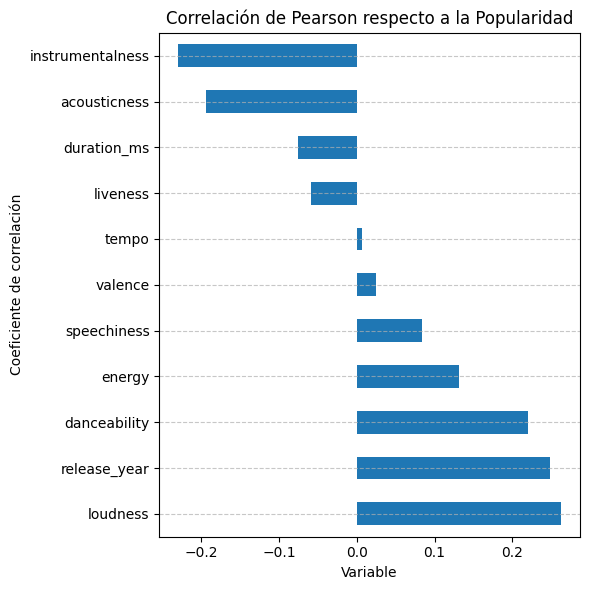

In [5]:
import matplotlib.pyplot as plt

# Calcular la correlación de Pearson de cada variable numérica respecto a 'popularity'
correlations = data.corr(numeric_only=True)['popularity'].sort_values(ascending=False)

# Excluir la autocorrelación
correlations = correlations.drop('popularity')

# Graficar las correlaciones
plt.figure(figsize=(6, 6))
correlations.plot(kind='barh')
plt.title('Correlación de Pearson respecto a la Popularidad')
plt.ylabel('Coeficiente de correlación')
plt.xlabel('Variable')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Cantidad de canciones por década


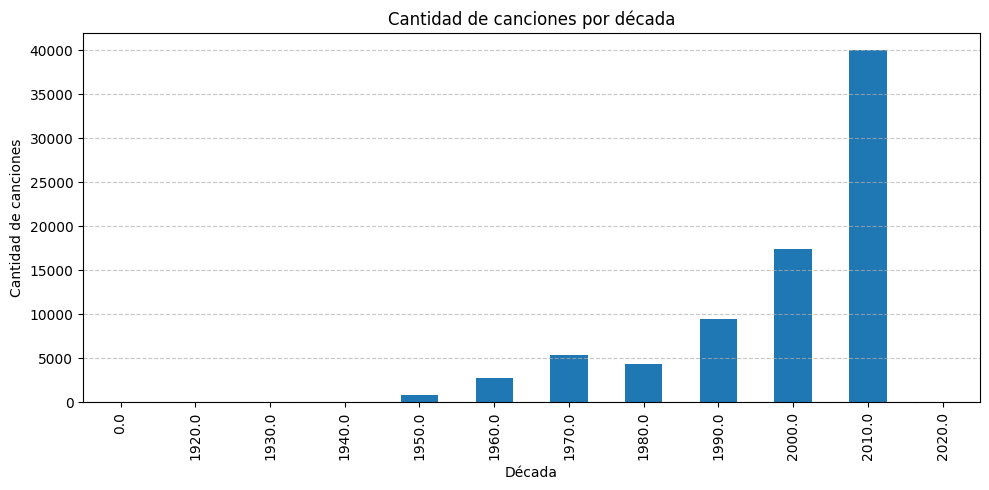

In [6]:
# Extraer el año desde el track_id si está codificado, pero normalmente no lo está.
# Si hay una columna de año, úsala. Si no, intentemos extraer el año del nombre de la canción o artista (no recomendado).
# Supongamos que hay una columna 'release_year' (si no, esto dará error y se debe ajustar según los datos reales).

if 'release_year' in data.columns:
    canciones_por_anio = data['release_year'].value_counts().sort_index()
    
    # Agrupar la cantidad de canciones por década
    decadas = (canciones_por_anio.index // 10) * 10
    canciones_por_decada = canciones_por_anio.groupby(decadas).sum()

    plt.figure(figsize=(10, 5))
    canciones_por_decada.plot(kind='bar')
    plt.title('Cantidad de canciones por década')
    plt.xlabel('Década')
    plt.ylabel('Cantidad de canciones')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No existe una columna 'release_year' en el DataFrame.")

In [7]:
# Graficar el promedio de varias características de sonido por año
import plotly.express as px
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
if 'release_year' in data.columns:
    df_avg = data.groupby('release_year')[sound_features].mean().reset_index()
    fig = px.line(
        df_avg,
        x='release_year',
        y=sound_features,
        markers=True,
        width=1000,
        height=600,
        color_discrete_sequence=px.colors.qualitative.Set1
    )
    fig.update_layout(
        title='Promedio de características de sonido por año',
        xaxis_title='Año',
        yaxis_title='Valor promedio',
        legend_title='Característica',
        template='plotly_white'
    )
    fig.show()
else:
    print("No existe una columna 'release_year' en el DataFrame.")

In [8]:
# Mostrar los 10 géneros más populares y sus características promedio
# Mostrar los 10 géneros más populares y sus características promedio
import plotly.express as px

data_by_genres = pd.read_csv("merged_songs.csv")

if 'genre' in data_by_genres.columns:
    # Agrupar por género y calcular el promedio de las características relevantes
    genre_data = data_by_genres.groupby('genre')[['popularity', 'valence', 'energy', 'danceability', 'acousticness']].mean().reset_index()
    # Seleccionar los 10 géneros con mayor popularidad promedio
    top10_genres = genre_data.nlargest(10, 'popularity')
    # Graficar las características promedio de los 10 géneros más populares
    fig = px.bar(
        top10_genres,
        x='genre',
        y=['valence', 'energy', 'danceability', 'acousticness'],
        barmode='group',
        title='Top 10 géneros más populares y sus características promedio'
    )
    fig.update_layout(
        xaxis_title='Género',
        yaxis_title='Valor promedio',
        legend_title='Característica',
        template='plotly_white'
    )
    fig.show()
else:
    print("No existe una columna 'genres'")

# Creacion del modelo


## Similitud por K neighbors


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances

# Seleccionar características numéricas relevantes
features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'valence', 'tempo'
]

# Separar datos en train y test para evaluación
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[features])
X_test = scaler.transform(test_data[features])

# Crear y ajustar el modelo KNN
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X_train)

,n_neighbors,5
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


In [10]:
# Evaluar el modelo usando solo la distancia euclidiana promedio entre cada canción de test y su recomendada
distancias = []

for i, row in test_data.iterrows():
    # Obtener el vector de la canción de test como DataFrame para mantener los nombres de columnas
    test_vector = scaler.transform(pd.DataFrame([row[features]], columns=features))
    distances_knn, indices = knn.kneighbors(test_vector)
    similar_idx = indices[0][0]  # El más cercano en train_data
    # Guardar la distancia euclidiana
    distancias.append(distances_knn[0][0])

distancia_media = np.mean(distancias) if distancias else 0
print(f"Distancia euclidiana promedio entre test y recomendación: {distancia_media:.4f}")

Distancia euclidiana promedio entre test y recomendación: 0.3065


In [11]:
from sklearn.metrics import ndcg_score

k = 10
precisiones = []
recalls = []
average_precisions = []
ndcgs = []

for i, row in test_data.iterrows():
    test_vector = scaler.transform(pd.DataFrame([row[features]], columns=features))
    # Calcular distancias a todo el set de entrenamiento
    dists = np.linalg.norm(X_train - test_vector, axis=1)
    # Ordenar índices por distancia (de menor a mayor)
    sorted_idx = np.argsort(dists)
    # Definir las k canciones más cercanas como relevantes
    relevancias = np.zeros(len(train_data))
    relevancias[sorted_idx[:k]] = 1
    # Obtener las k recomendaciones del modelo
    distances_knn, indices = knn.kneighbors(test_vector, n_neighbors=k)
    recommended_idx = indices[0]
    # Relevancia de las recomendaciones
    recommended_relevancias = relevancias[recommended_idx]
    num_relevantes = k  # Por definición, hay k relevantes
    # Precisión@k
    precision = np.sum(recommended_relevancias) / k
    precisiones.append(precision)
    # Recall@k
    recall = np.sum(recommended_relevancias) / num_relevantes if num_relevantes > 0 else 0
    recalls.append(recall)
    # MAP
    if np.sum(recommended_relevancias) > 0:
        ap = 0
        hits = 0
        for idx, rel in enumerate(recommended_relevancias, 1):
            if rel:
                hits += 1
                ap += hits / idx
        ap /= np.sum(recommended_relevancias)
    else:
        ap = 0
    average_precisions.append(ap)
    # NDCG
    ndcg = ndcg_score([relevancias[recommended_idx]], [1 - distances_knn[0]])
    ndcgs.append(ndcg)

print(f"Precisión@{k}: {np.mean(precisiones):.4f}")
print(f"Recall@{k}: {np.mean(recalls):.4f}")
print(f"MAP: {np.mean(average_precisions):.4f}")
print(f"NDCG@{k}: {np.mean(ndcgs):.4f}")

Precisión@10: 0.9800
Recall@10: 0.9800
MAP: 0.9993
NDCG@10: 0.9998


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score
import numpy as np
import pandas as pd

class KNN_model:
    def __init__(self, features=None, n_neighbors=10):
        if features is None:
            self.features = [
                'acousticness', 'danceability', 'energy', 'instrumentalness',
                'liveness', 'loudness', 'speechiness', 'valence', 'tempo'
            ]
        else:
            self.features = features
        self.n_neighbors = n_neighbors
        self.scaler = StandardScaler()
        self.knn = None
        self.train_data = None
        self.test_data = None
        self.X_train = None
        self.X_test = None

    def train(self, data, test_size=0.2, random_state=42):
        self.train_data, self.test_data = train_test_split(
            data, test_size=test_size, random_state=random_state
        )
        self.X_train = self.scaler.fit_transform(self.train_data[self.features])
        self.X_test = self.scaler.transform(self.test_data[self.features])
        self.knn = NearestNeighbors(n_neighbors=self.n_neighbors, metric='euclidean')
        self.knn.fit(self.X_train)

    def evaluate(self, k=10):
        precisiones = []
        recalls = []
        average_precisions = []
        ndcgs = []
        distancias = []
        for i, row in self.test_data.iterrows():
            test_vector = self.scaler.transform(pd.DataFrame([row[self.features]], columns=self.features))
            dists = np.linalg.norm(self.X_train - test_vector, axis=1)
            sorted_idx = np.argsort(dists)
            relevancias = np.zeros(len(self.train_data))
            relevancias[sorted_idx[:k]] = 1
            distances_knn, indices = self.knn.kneighbors(test_vector, n_neighbors=k)
            recommended_idx = indices[0]
            recommended_relevancias = relevancias[recommended_idx]
            num_relevantes = k
            # Distancia euclidiana al vecino más cercano
            distancias.append(distances_knn[0][0])
            # Precisión@k
            precision = np.sum(recommended_relevancias) / k
            precisiones.append(precision)
            # Recall@k
            recall = np.sum(recommended_relevancias) / num_relevantes if num_relevantes > 0 else 0
            recalls.append(recall)
            # MAP
            if np.sum(recommended_relevancias) > 0:
                ap = 0
                hits = 0
                for idx, rel in enumerate(recommended_relevancias, 1):
                    if rel:
                        hits += 1
                        ap += hits / idx
                ap /= np.sum(recommended_relevancias)
            else:
                ap = 0
            average_precisions.append(ap)
            # NDCG
            ndcg = ndcg_score([relevancias[recommended_idx]], [1 - distances_knn[0]])
            ndcgs.append(ndcg)
        distancia_media = np.mean(distancias) if distancias else 0
        print(f"Distancia euclidiana promedio entre test y recomendación: {distancia_media:.4f}")
        print(f"Precisión@{k}: {np.mean(precisiones):.4f}")
        print(f"Recall@{k}: {np.mean(recalls):.4f}")
        print(f"MAP: {np.mean(average_precisions):.4f}")
        print(f"NDCG@{k}: {np.mean(ndcgs):.4f}")

    def recomend_songs(self, songs_df, n_recommendations=5):
        """
        songs_df: DataFrame con las canciones de entrada (debe tener las columnas de self.features)
        n_recommendations: número de canciones a recomendar (por defecto 5)
        Devuelve las canciones más cercanas del set de entrenamiento y su similitud (1 - distancia normalizada).
        """
        mean_vector = songs_df[self.features].mean().values.reshape(1, -1)
        mean_vector_scaled = self.scaler.transform(pd.DataFrame(mean_vector, columns=self.features))
        distances, indices = self.knn.kneighbors(mean_vector_scaled, n_neighbors=n_recommendations)
        recommended = self.train_data.iloc[indices[0]].copy()
        recommended['distance'] = distances[0]
        # Normalizar las distancias para calcular similitud (similitud = 1 - distancia/distancia_max)
        max_dist = distances[0].max() if distances[0].max() > 0 else 1
        recommended['similarity'] = 1 - (recommended['distance'] / max_dist)
        return recommended.sort_values('distance')



Uso de la Clase


In [13]:
# Ejemplo de uso:
model = KNN_model()
model.train(data)
model.evaluate()
recomendaciones = model.recomend_songs(data.sample(2))
print(recomendaciones)

Distancia euclidiana promedio entre test y recomendación: 0.3065
Precisión@10: 0.9800
Recall@10: 0.9800
MAP: 0.9993
NDCG@10: 0.9998
       genre          artist_name                   track_name  \
5727   Dance         Cyndi Lauper  Girls Just Want to Have Fun   
32469    Pop         Cyndi Lauper  Girls Just Want to Have Fun   
72450  Dance        Years & Years                       Desire   
74269  Dance        Austin Mahone         Lady (feat. Pitbull)   
48184    Ska  Los Enanitos Verdes               Amores Lejanos   

                     track_id  popularity  acousticness  danceability  \
5727   4y1LsJpmMti1PfRQV9AWWe          75         0.220         0.710   
32469  4y1LsJpmMti1PfRQV9AWWe          76         0.220         0.710   
72450  4ZH03VC3uJk7uKk7CwsBqH          54         0.299         0.706   
74269  1vh2gglO81p1KxQ2JlgFoy          58         0.165         0.751   
48184  11AnIo9kTnjhtD06y5Zd5O          57         0.277         0.740   

       duration_ms  energy  inst

In [14]:
recomendaciones = model.recomend_songs(data.sample(10))
print(recomendaciones)

       genre artist_name                          track_name  \
17968   Folk  Johnnyswim                                Home   
6385   Dance      Matoma  Sunday Morning (feat. Josie Dunne)   
33318    Pop      VÉRITÉ                       Somebody Else   
51939   Soul      VÉRITÉ                       Somebody Else   
6540   Dance      VÉRITÉ                       Somebody Else   

                     track_id  popularity  acousticness  danceability  \
17968  2BX2njwutbKutDcLVFiqUU          48         0.235         0.647   
6385   7dhyhMtWWJNYWmE4N5XiEA          62         0.173         0.673   
33318  34i4yxPrHWquuR4kjiivFO          67         0.201         0.674   
51939  34i4yxPrHWquuR4kjiivFO          67         0.201         0.674   
6540   34i4yxPrHWquuR4kjiivFO          67         0.201         0.674   

       duration_ms  energy  instrumentalness  ... liveness  loudness   mode  \
17968       211107   0.627          0.000000  ...    0.144    -7.080  Major   
6385        185806

## Clustering con KMeans

### Elaboración del modelo

In [57]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

class KMeans_model:
    """Clase para implementar el modelo de recomendación mediante clustering KMeans."""

    def __init__(self, n_clusters=8, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.model = None

    def fit(self, X):
        """Ajusta el modelo KMeans a los datos en X."""
        self.model = KMeans(n_clusters=self.n_clusters, random_state=self.random_state, n_init=10).fit(X)
        return self.model

    def predict(self, X):
        """Predice las etiquetas de cluster para los datos en X."""
        if self.model is not None:
            return self.model.predict(X)
        else:
            raise ValueError("El modelo no ha sido entrenado.")

    def _flatten_dict_list(self, dict_list: list):
        """Aplana una lista de diccionarios en un único diccionario"""
        flattened_dict = dict()
        for key in dict_list[0].keys():
            flattened_dict[key] = []
        for dictionary in dict_list:
            for key, value in dictionary.items():
                flattened_dict[key].append(value)
        return flattened_dict

    def _get_mean_vector(self, song_list):
        """Calcula el vector medio representativo de una lista de canciones."""
        song_vectors = []
        for song in song_list:
            song_vector = song[features].values
            song_vectors.append(song_vector)
        song_matrix = np.array(list(song_vectors))
        return np.mean(song_matrix, axis=0)

    def recommend_songs(self, song_list, spotify_data, n_songs=10):
        """
        Ofrece una lista de `n_songs` recomendaciones a partir de una lista de canciones escuchadas,
        recomendando solo canciones del mismo cluster.
        """
        metadata_cols = ['track_name', 'artist_name', 'track_id', 'release_year', 'distance']
        song_dict = self._flatten_dict_list(song_list)
        song_center = self._get_mean_vector(song_list)
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(spotify_data[features])
        song_center_df = pd.DataFrame([song_center], columns=features)
        scaled_song_center = scaler.transform(song_center_df)

        # Ajustar KMeans si no está ajustado
        if self.model is None:
            self.fit(scaled_data)

        # Obtener el cluster del centro de las canciones escuchadas
        cluster_labels = self.model.labels_
        center_cluster = self.predict(scaled_song_center)[0]

        # Filtrar canciones del mismo cluster y no escuchadas
        mask_cluster = cluster_labels == center_cluster
        mask_not_listened = ~spotify_data['track_id'].isin(song_dict['track_id'])
        mask = mask_cluster & mask_not_listened.values
        filtered_indices = np.where(mask)[0]

        if len(filtered_indices) == 0:
            return []

        filtered_scaled_data = scaled_data[filtered_indices]
        distances = cdist(scaled_song_center, filtered_scaled_data, 'cosine')[0]
        top_indices = np.argsort(distances)[:n_songs]
        selected_indices = filtered_indices[top_indices]

        rec_songs = spotify_data.iloc[selected_indices].copy()
        rec_songs['distance'] = distances[top_indices]
        return rec_songs[metadata_cols].to_dict(orient='records')

    def evaluate(self, test_data, train_data, n_songs=10):
        """
        Evalúa el modelo usando métricas de recomendación.
        """
        scaler = StandardScaler()
        X_train = scaler.fit_transform(train_data[features])
        if self.model is None:
            self.fit(X_train)
        precisiones = []
        recalls = []
        average_precisions = []
        ndcgs = []
        distancias = []
        for i, row in test_data.iterrows():
            recommendations = self.recommend_songs([row], train_data, n_songs=n_songs)
            if not recommendations:
                continue
            recommended_global_idx = [train_data[train_data['track_id'] == rec['track_id']].index[0] for rec in recommendations]
            recommended_idx = [train_data.index.get_loc(idx) for idx in recommended_global_idx]
            test_vector = scaler.transform(pd.DataFrame([row[features]], columns=features))
            dists = np.linalg.norm(X_train - test_vector, axis=1)
            sorted_idx = np.argsort(dists)
            relevancias = np.zeros(len(train_data))
            relevancias[sorted_idx[:n_songs]] = 1
            recommended_relevancias = relevancias[recommended_idx]
            num_relevantes = n_songs
            distancias.append(recommendations[0]['distance'])
            precision = np.sum(recommended_relevancias) / n_songs
            precisiones.append(precision)
            recall = np.sum(recommended_relevancias) / num_relevantes if num_relevantes > 0 else 0
            recalls.append(recall)
            if np.sum(recommended_relevancias) > 0:
                ap = 0
                hits = 0
                for idx, rel in enumerate(recommended_relevancias, 1):
                    if rel:
                        hits += 1
                        ap += hits / idx
                ap /= np.sum(recommended_relevancias)
            else:
                ap = 0
            average_precisions.append(ap)
            recommended_scores = 1 - dists[recommended_idx] / (dists[recommended_idx].max() if dists[recommended_idx].max() > 0 else 1)
            from sklearn.metrics import ndcg_score
            ndcg = ndcg_score([relevancias[recommended_idx]], [recommended_scores])
            ndcgs.append(ndcg)
        distancia_media = np.mean(distancias) if distancias else 0
        print(f"Distancia euclidiana promedio entre test y recomendación: {distancia_media:.4f}")
        print(f"Precisión@{n_songs}: {np.mean(precisiones):.4f}")
        print(f"Recall@{n_songs}: {np.mean(recalls):.4f}")
        print(f"MAP: {np.mean(average_precisions):.4f}")
        print(f"NDCG@{n_songs}: {np.mean(ndcgs):.4f}")

In [58]:
# Evaluar el modelo
kmeans_model = KMeans_model(n_clusters=8)
kmeans_model.fit(X_train)
kmeans_model.evaluate(test_data, train_data, n_songs=10)

Distancia euclidiana promedio entre test y recomendación: 0.0234
Precisión@10: 0.5651
Recall@10: 0.5651
MAP: 0.7848
NDCG@10: 0.9856


In [59]:
# Usar el modelo
recomendaciones_kmeans = kmeans_model.recommend_songs([test_data.iloc[0]], train_data)
print(recomendaciones_kmeans)

[{'track_name': 'Run Wild', 'artist_name': 'Jon Bellion', 'track_id': '0FsGUPoOMHzHnViGBKbBLX', 'release_year': 2014.0, 'distance': 0.013150288746176297}, {'track_name': 'Run Wild', 'artist_name': 'Jon Bellion', 'track_id': '0FsGUPoOMHzHnViGBKbBLX', 'release_year': 2014.0, 'distance': 0.013150288746176297}, {'track_name': 'Hoe Cakes', 'artist_name': 'MF DOOM', 'track_id': '6OyRpRa1xjDNriftwh1dZR', 'release_year': 2004.0, 'distance': 0.03935060184933403}, {'track_name': 'Joy Ride (feat. Mr. Lif and Sitali)', 'artist_name': 'Thievery Corporation', 'track_id': '4XQiZMzkvpL3KlS9PjNuFS', 'release_year': 2018.0, 'distance': 0.04721173787166222}, {'track_name': 'Be Here', 'artist_name': 'Raphael Saadiq', 'track_id': '7x6ev0H9OAmvuDnyuItBZS', 'release_year': 2002.0, 'distance': 0.04813855586310967}, {'track_name': 'Be Here', 'artist_name': 'Raphael Saadiq', 'track_id': '7x6ev0H9OAmvuDnyuItBZS', 'release_year': 2002.0, 'distance': 0.04813855586310967}, {'track_name': 'Bitches N Marijuana', 'art

## Clustering con DBSCAN

### Elaboración del modelo

In [60]:
# Importar librerías
from sklearn.cluster import DBSCAN

class DBSCAN_model:
    """Clase para implementar el modelo de recomendación mediante clustering DBSCAN."""
    
    def __init__(self, eps=0.5, min_samples=5):
        """Inicializa el modelo con los parámetros de DBSCAN."""
        self.eps = eps
        self.min_samples = min_samples
        self.model = None

    def fit(self, X):
        """Ajusta el modelo DBSCAN a los datos en X."""
        self.model = DBSCAN(eps=self.eps, min_samples=self.min_samples, metric="euclidean").fit(X)
        return self.model

    def predict(self, X):
        """Predice las etiquetas de cluster para los datos en X."""
        if self.model is not None:
            return self.model.fit_predict(X)
        else:
            raise ValueError("El modelo no ha sido entrenado.")

    def _flatten_dict_list(self, dict_list: list[dict]):
        """Aplana una lista de diccionarios en un único diccionario"""
        flattened_dict = dict()
        for key in dict_list[0].keys():
            flattened_dict[key] = []
        
        for dictionary in dict_list:
            for key, value in dictionary.items():
                flattened_dict[key].append(value)
                
        return flattened_dict

    def _get_mean_vector(self, song_list):
        """Calcula el vector medio representativo de una lista de canciones."""
        song_vectors = []

        for song in song_list:
            song_vector = song[features].values
            song_vectors.append(song_vector)

        song_matrix = np.array(list(song_vectors))
        return np.mean(song_matrix, axis=0)
        
    def recommend_songs(self, song_list, spotify_data, n_songs=10):
        """Ofrece una lista de `n_songs` recomendaciones a partir de una lista de canciones escuchadas."""
        metadata_cols = ['track_name', 'artist_name', 'track_id', 'release_year', 'distance']
        song_dict = self._flatten_dict_list(song_list)
        
        song_center = self._get_mean_vector(song_list)
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(spotify_data[features])
        song_center_df = pd.DataFrame([song_center], columns=features)
        scaled_song_center = scaler.transform(song_center_df)
        # scaled_song_center = scaler.transform(song_center.reshape(1, -1))
        distances = cdist(scaled_song_center, scaled_data, 'cosine')[0]
        
        # Exclude already listened songs
        mask = ~spotify_data['track_id'].isin(song_dict['track_id'])
        filtered_indices = np.where(mask)[0]
        filtered_distances = distances[filtered_indices]

        # Get indices of the n_songs closest songs
        top_indices = filtered_indices[np.argsort(filtered_distances)[:n_songs]]

        rec_songs = spotify_data.iloc[top_indices].copy()
        rec_songs['distance'] = distances[top_indices]
        return rec_songs[metadata_cols].to_dict(orient='records')

In [61]:
# Entrenar el modelo DBSCAN
dbscan_model = DBSCAN_model(eps=0.5, min_samples=5)
dbscan_model.fit(X_train)

,eps,0.5
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [62]:
# Evaluar el modelo usando solo la distancia euclidiana promedio entre cada canción de test y su recomendada
distancias = []

for i, row in test_data.iterrows():
    # Obtener el vector de la canción de test como DataFrame para mantener los nombres de columnas
    recommendations = dbscan_model.recommend_songs([row], data, n_songs=1)
    distancias.append(recommendations[0]['distance'])

distancia_media = np.mean(distancias) if distancias else 0
print(
    f"Distancia euclidiana promedio entre test y recomendación: {distancia_media:.4f}"
)

Distancia euclidiana promedio entre test y recomendación: 0.0212


In [63]:
k = 10
precisiones = []
recalls = []
average_precisions = []
ndcgs = []

for i, row in test_data.iterrows():
    # Obtener recomendaciones del modelo DBSCAN
    recommendations = dbscan_model.recommend_songs([row], train_data, n_songs=k)
    # Obtener los índices globales de las canciones recomendadas en el set de entrenamiento
    recommended_global_idx = [train_data[train_data['track_id'] == rec['track_id']].index[0] for rec in recommendations]
    # Convertir los índices globales a índices posicionales (0-based)
    recommended_idx = [train_data.index.get_loc(idx) for idx in recommended_global_idx]
    # Calcular distancias entre la canción de test y todas las canciones de entrenamiento
    test_vector = scaler.transform(pd.DataFrame([row[features]], columns=features))
    dists = np.linalg.norm(X_train - test_vector, axis=1)
    sorted_idx = np.argsort(dists)
    # Definir las k canciones más cercanas como relevantes
    relevancias = np.zeros(len(train_data))
    relevancias[sorted_idx[:k]] = 1
    # Relevancia de las recomendaciones
    recommended_relevancias = relevancias[recommended_idx]
    num_relevantes = k  # Por definición, hay k relevantes
    # Precisión@k
    precision = np.sum(recommended_relevancias) / k
    precisiones.append(precision)
    # Recall@k
    recall = np.sum(recommended_relevancias) / num_relevantes if num_relevantes > 0 else 0
    recalls.append(recall)
    # MAP
    if np.sum(recommended_relevancias) > 0:
        ap = 0
        hits = 0
        for idx, rel in enumerate(recommended_relevancias, 1):
            if rel:
                hits += 1
                ap += hits / idx
        ap /= np.sum(recommended_relevancias)
    else:
        ap = 0
    average_precisions.append(ap)
    # NDCG
    # Para NDCG, usamos la relevancia y una "score" inversa a la distancia (similitud)
    recommended_scores = 1 - dists[recommended_idx] / (dists[recommended_idx].max() if dists[recommended_idx].max() > 0 else 1)
    ndcg = ndcg_score([relevancias[recommended_idx]], [recommended_scores])
    ndcgs.append(ndcg)

print(f"Precisión@{k}: {np.mean(precisiones):.4f}")
print(f"Recall@{k}: {np.mean(recalls):.4f}")
print(f"MAP: {np.mean(average_precisions):.4f}")
print(f"NDCG@{k}: {np.mean(ndcgs):.4f}")


Precisión@10: 0.5911
Recall@10: 0.5911
MAP: 0.7811
NDCG@10: 0.9868
